In [3]:
%matplotlib inline

In [32]:
import numpy as np
import pandas as pd
import sigflux
from sigflux.wave import cwtlets
from scipy import signal

import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, imshow, scatter
from matplotlib import rcParams

In [154]:
df = pd.read_csv('output/eeg1506721590.csv', index_col=0)
df = df.iloc[:-1] # shave off last because it's usually corrupted
# df.drop([5,6,7], axis=1, inplace=True)
df['dt'] = pd.to_datetime(df['time'])
df.set_index('dt', inplace=True)
df.drop('time', axis=1, inplace=True)
print(df.dtypes)
print(df.isnull().sum())
print(len(df))
df.head()

ch0    float64
ch1    float64
ch2    float64
ch3    float64
ch4    float64
dtype: object
ch0    0
ch1    0
ch2    0
ch3    0
ch4    0
dtype: int64
10359


,ch0,ch1,ch2,ch3,ch4
dt,,,,,
2017-09-29 21:46:30.803972864,780.073242,830.439575,424.285706,808.278381,818.351624
2017-09-29 21:46:30.804722688,785.311340,829.230774,348.131866,822.783875,806.263733
2017-09-29 21:46:30.805357312,863.076904,834.468872,323.956055,863.882812,826.007324
2017-09-29 21:46:30.806004480,889.267395,834.468872,381.978027,865.897461,864.688660
2017-09-29 21:46:30.806619392,834.065918,834.065918,422.271057,829.633728,859.853455


In [155]:
df.tail()

,ch0,ch1,ch2,ch3,ch4
dt,,,,,
2017-09-29 21:47:40.966659072,1338.937744,864.688660,999.670349,898.131897,790.146545
2017-09-29 21:47:40.968532736,641.868103,853.003662,1006.520142,815.934082,767.582397
2017-09-29 21:47:41.051155968,1362.710571,850.586060,1024.249023,898.131897,850.183167
2017-09-29 21:47:41.092564480,1075.824219,852.600708,1025.457886,847.362610,801.428589
2017-09-29 21:47:41.155330304,653.956055,857.032959,1039.157471,809.084229,767.179504


In [156]:
df.mean()

ch0    611.709342
ch1    836.587526
ch2    811.708878
ch3    858.204107
ch4    833.048008
dtype: float64

In [157]:
df = df[~df.isnull()]
print(df.isnull().sum())
print(len(df))

ch0    0
ch1    0
ch2    0
ch3    0
ch4    0
dtype: int64
10359


In [158]:
df.index

DatetimeIndex(['2017-09-29 21:46:30.803972864',
               '2017-09-29 21:46:30.804722688',
               '2017-09-29 21:46:30.805357312',
               '2017-09-29 21:46:30.806004480',
               '2017-09-29 21:46:30.806619392',
               '2017-09-29 21:46:30.807235584',
               '2017-09-29 21:46:30.807807488',
               '2017-09-29 21:46:30.808443648',
               '2017-09-29 21:46:30.809026816',
               '2017-09-29 21:46:30.809687808',
               ...
               '2017-09-29 21:47:40.964805376',
               '2017-09-29 21:47:40.965562112',
               '2017-09-29 21:47:40.965690112',
               '2017-09-29 21:47:40.965784320',
               '2017-09-29 21:47:40.966535424',
               '2017-09-29 21:47:40.966659072',
               '2017-09-29 21:47:40.968532736',
               '2017-09-29 21:47:41.051155968',
               '2017-09-29 21:47:41.092564480',
               '2017-09-29 21:47:41.155330304'],
              dtype=

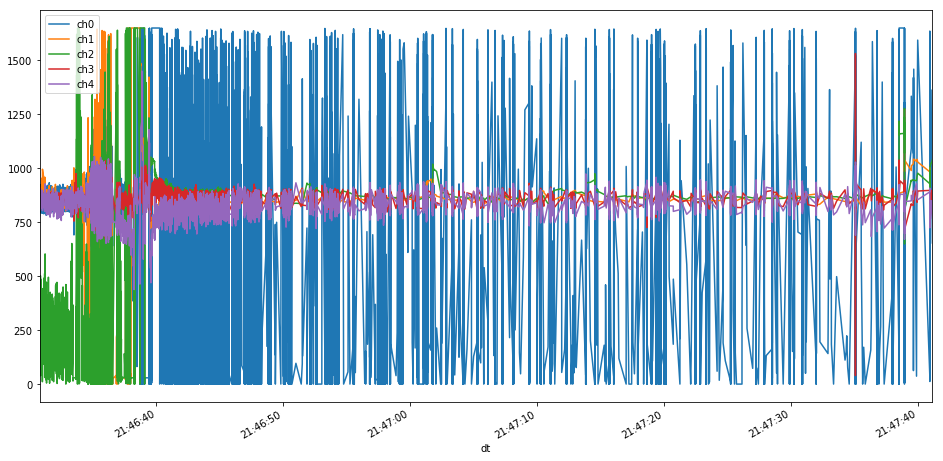

In [159]:
df.plot()

In [160]:
df -= df.mean()

In [161]:
# df = df.clip(-250,250)

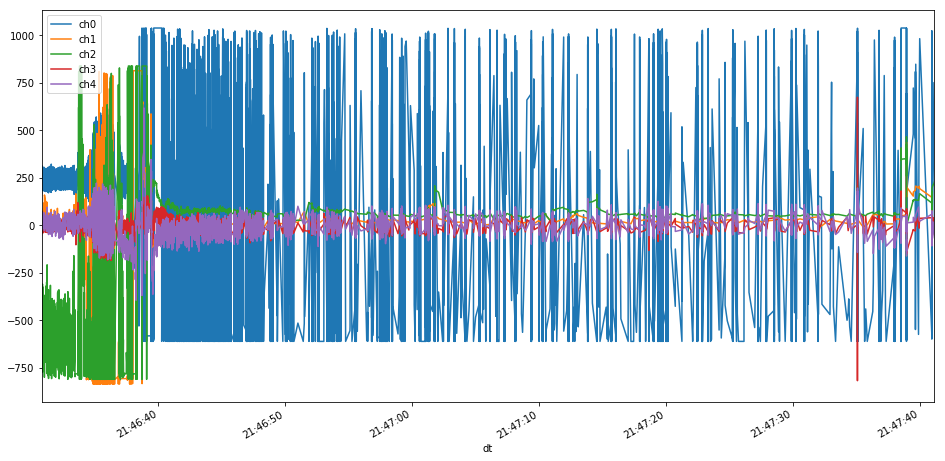

In [162]:
df.plot()

In [165]:
widths = np.linspace(1,16, 30)**2
wt = sigflux.cwt(df.as_matrix()[:,4], signal.ricker, widths)

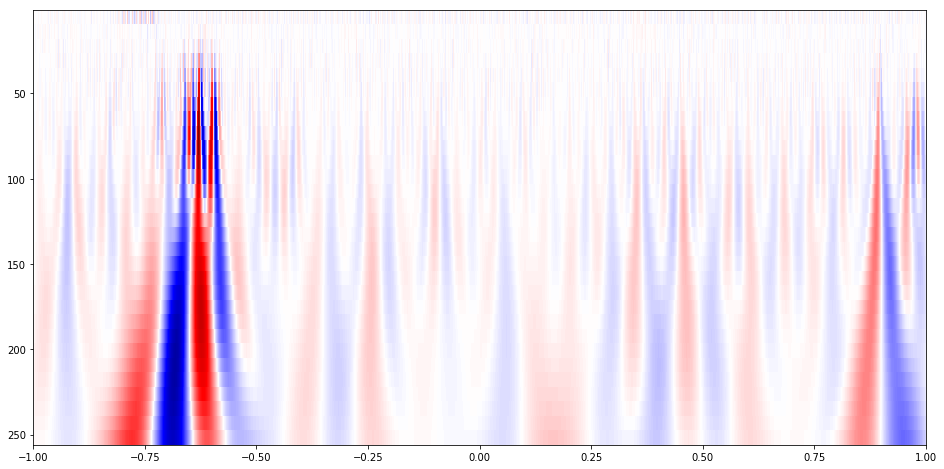

In [169]:
rcParams['figure.figsize'] = (16,8)
img = wt
plt.imshow(img, extent=[-1, 1, widths[-1], widths[0]], cmap='seismic', aspect='auto',
            vmax=abs(img).max(), vmin=-abs(img).max())